<a href="https://colab.research.google.com/github/ssroyal/YouTubeCommentAnalysis/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vaderSentiment
!pip install httplib2
!pip install google-api-python-client
!pip install oauth2client

     |████████████████████████████████| 133kB 5.8MB/s 


In [3]:
import time
import httplib2
import os
import sys
import csv
from apiclient.discovery import build_from_document
from apiclient.errors import HttpError
from oauth2client.client import flow_from_clientsecrets
from oauth2client.file import Storage
from oauth2client.tools import argparser, run_flow
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from oauth2client import tools

timer=2
count=0

fresult= {"positivenum":0,"negativenum":0,"neutralnum":0}

commentbot = SentimentIntensityAnalyzer()

CLIENT_SECRETS_FILE = "client_secrets.json"
video_id = "Twhy-VlTWZA"

YOUTUBE_READ_WRITE_SSL_SCOPE = "https://www.googleapis.com/auth/youtube.force-ssl"
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

MISSING_CLIENT_SECRETS_MESSAGE = """
WARNING: Please configure OAuth 2.0
To make this sample run you will need to populate the client_secrets.json file
found at:
   %s
with information from the APIs Console
https://console.developers.google.com
For more information about the client_secrets.json file format, please visit:
https://developers.google.com/api-client-library/python/guide/aaa_client_secrets
""" 
def get_authenticated_service(args):
    flow = flow_from_clientsecrets(CLIENT_SECRETS_FILE, scope=YOUTUBE_READ_WRITE_SSL_SCOPE,
        message=MISSING_CLIENT_SECRETS_MESSAGE)

    storage = Storage("%s-oauth2.json" % sys.argv[0])
    credentials = storage.get()

    if credentials is None or credentials.invalid:
        credentials = run_flow(flow, storage, args)

    with open("youtube-v3-discoverydocument.json", "r") as f:
        doc = f.read()
        return build_from_document(doc, http=credentials.authorize(httplib2.Http()))

# examplevideoid = fc93EBfcb7w
def get_comment_threads(youtube, video_id, comments=[], token=""):
    results = youtube.commentThreads().list(
        part="snippet",
        pageToken=token,
        videoId=video_id,
        textFormat="plainText"
    ).execute()

    for item in results["items"]:
        comment = item["snippet"]["topLevelComment"]
        text = comment["snippet"]["textDisplay"]
        comments.append(text)

    if "nextPageToken" in results:
        return get_comment_threads(youtube, video_id, comments, results["nextPageToken"])
    else:
        return comments

/usr/local/lib/python3.7/dist-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py-oauth2.json: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))



Failed to start a local webserver listening on either port 8080
or port 8090. Please check your firewall settings and locally
running programs that may be blocking or using those ports.

Falling back to --noauth_local_webserver and continuing with
authorization.


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=308314956919-lnk82ot68emnp0r1a1h0tj37olfmikrn.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&access_type=offline&response_type=code

Enter verification code: 4/1AY0e-g4ULfI7tkASpaXs-ww2ryp486Qj9p2Cdv8ZicVoeEortL0LRO3zO_c
Authentication successful.


 ********************* YOUTUBE COMMENT ANALYZER *********************

 ********************************************************************

 ==> Scraping 4286 comments to commentscraperfile.csv 



 ************************ GENERATING REPORT *************************


 ==> READING THROU

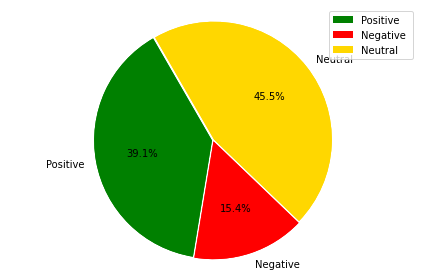

In [5]:
args = tools.argparser.parse_args(args=[])
youtube = get_authenticated_service(args)
try:
    video_comment_threads = get_comment_threads(youtube, video_id)
    with open('commentscraperfile.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        for comment in video_comment_threads:
            writer.writerow([comment])

    print("\n")

    gen = ' ********************* YOUTUBE COMMENT ANALYZER *********************'
    for i in gen:
        print (i, end='')
        sys.stdout.flush()
        time.sleep(0.05)
    print("\n")

    gen= ' ********************************************************************'
    for i in gen:
        print(i, end='')
        sys.stdout.flush()
        time.sleep(0.05)

    time.sleep(timer)
    print("\n\n ==> Scraping {0} comments to commentscraperfile.csv \n".format(len(video_comment_threads)))

except HttpError as e:
    print(" ==>An HTTP error %d occurred:\n%s" % (e.resp.status, e.content))

with open("commentscraperfile.csv","r",errors='ignore') as csvfile:
    for line in csvfile.read().split('\n'):
        vs = commentbot.polarity_scores(line)
        count += 1
        if vs['compound']>= 0.05:
            fresult["positivenum"] +=1
        elif vs['compound']<= - 0.05:
            fresult["negativenum"] += 1
        else:
            fresult["neutralnum"] += 1

print("\n")

gen = ' ************************ GENERATING REPORT *************************'
for i in gen:
    print(i, end='')
    sys.stdout.flush()
    time.sleep(0.05)
print("\n")
time.sleep(1)
print("\n ==> READING THROUGH A TOTAL OF",count,"LINES...\n")

time.sleep(1)
print(" ==> AFTER ANALYZING THE SENTIMENT OF",count,"LINES..\n")

positivenum = fresult["positivenum"]
time.sleep(1)
print(" ==> NUMBER OF POSITIVE COMMENTS ARE : ",positivenum,"\n")

negativenum = fresult["negativenum"]
time.sleep(1)
print(" ==> NUMBER OF NEGATIVE COMMENTS ARE : ",negativenum,"\n")

neutralnum  = fresult["neutralnum"]
time.sleep(1)
print(" ==> NUMBER OF NEUTRAL COMMENTS ARE : ",neutralnum,"\n")

positive_percentage = positivenum / count * 100

negative_percentage = negativenum / count * 100

neutral_percentage = neutralnum / count * 100

size1 = positive_percentage / 100 * 360

size2 = negative_percentage / 100 * 360

size3 = neutral_percentage / 100 * 360
time.sleep(1)
print(" ==> PERCENTAGE OF COMMENTS THAT ARE POSITIVE : ",positive_percentage,"%\n")
time.sleep(1)
print(" ==> PERCENTAGE OF COMMENTS THAT ARE NEGATIVE : ",negative_percentage,"%\n")
time.sleep(1)
print(" ==> PERCENTAGE OF COMMENTS THAT ARE NEUTRAL  : ",neutral_percentage,"%\n")
time.sleep(1)
print(" ==> CALCULATING FINAL RESULT.. :-\n")
time.sleep(3)
print(" ********************************************************************\n")

if positive_percentage >= (neutral_percentage + negative_percentage + 10) :
    print(" ==> GREAT JOB!! You got positive feeback.")

elif negative_percentage>= (neutral_percentage + positive_percentage + 10):
    print(" ==> SORRY!! You got negative feedback.")

else :
    print(" ==> NICE TRY!! You got neutral feedback.")

print("\n ********************************************************************\n")

labels = 'Positive', 'Negative ','Neutral'

sizes = [size1, size2, size3]

colors = ['Green', 'Red', 'gold']

explode = (0.01, 0.01, 0.01)

patches, texts = plt.pie(sizes, explode=explode, colors=colors
,startangle=120)

plt.legend(patches, labels, loc="best")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%',startangle= 120, textprops={'fontsize': 10})

plt.tight_layout()

plt.axis('equal')

plt.show()